In [3]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline

path = "./measurements"
files = glob.glob(path + "/*.csv")

# combining measurements from different clients into one data frame
list = []
for f in files:
    df = pd.read_csv(f, header=0)
    list.append(df)

#df = pd.concat(list)
df = pd.read_csv('measurements.csv')
df

,Unnamed: 0,time-to-certificate,num-nodes,csr-size,adversary-type,adversary-fraction
0,0,56,30,100,none,0.0
1,1,136,30,100,none,0.0
2,2,135,30,100,none,0.0
3,3,108,30,100,none,0.0
4,4,141,30,100,none,0.0
...,...,...,...,...,...,...
10295,245,60,10,100,crash,0.3
10296,246,40,10,100,crash,0.3
10297,247,44,10,100,crash,0.3
10298,248,40,10,100,crash,0.3


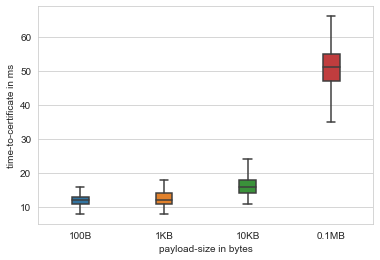

In [46]:
fourNodes = df.loc[(df["num-nodes"] == 4) & (df["csr-size"] <= 100000)]
sns.set_style("whitegrid")
 
bplot = sns.boxplot(y="time-to-certificate", 
            x="csr-size",
            data=fourNodes,
            showfliers=False,
            width=0.2,)


bplot.set(xlabel ="payload-size in bytes", ylabel = "time-to-certificate in ms")
#plt.yscale("log")
xlabels = ["100B", "1KB", "10KB", "0.1MB"]
bplot.set_xticklabels(xlabels)
plt.savefig("payload-plot.pdf")

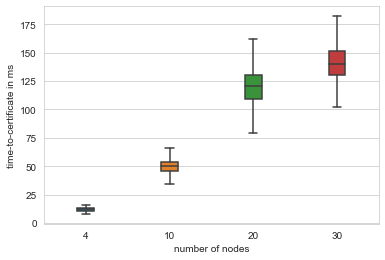

In [45]:
hundredBytes = df.loc[df["csr-size"] == 100]
hundredBytes


node_count_plot = sns.boxplot(y="time-to-certificate", 
            x="num-nodes",
            data=hundredBytes,
            showfliers=False,
            width=0.2,)
node_count_plot.set(xlabel ="number of nodes", ylabel = "time-to-certificate in ms")
plt.savefig("num-nodes-plot.pdf")

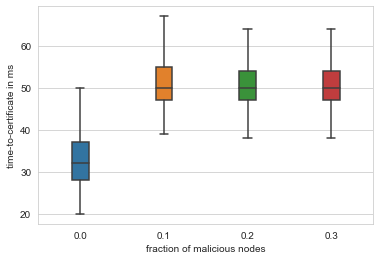

In [44]:
adv = df.loc[(df["num-nodes"] == 10) & (df["csr-size"] == 100)]


adv_frac_plot = sns.boxplot(y="time-to-certificate", 
            x="adversary-fraction",
            data=adv,
            showfliers=False,
            width=0.2,)

adv_frac_plot.set(xlabel ="fraction of malicious nodes", ylabel = "time-to-certificate in ms")
plt.savefig("adv-frac-plot.pdf")